<a href="https://colab.research.google.com/github/xKDR/Julia-Workshop/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.11.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.10.4 on the current Colab Runtime...
2024-10-23 05:56:43 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.10/julia-1.10.4-linux-x86_64.tar.gz [173704015/173704015] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.11.2
Commit 5e9a32e7af2 (2024-12-01 20:02 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/lib64-nvidia
  JULIA_NUM_THREADS = 2


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

# Setup

Please run the following cell to setup the packages needed to follow along with the workshop. This can take some time to finish so it is recommended to do this ahead of time and allow it to finish.

In [ ]:
import Pkg
Pkg.add(["Flux", "NNlib", "CUDA", "Optimisers", "Transformers", "FileIO", "ImageShow", "MLDatasets", "ImageCore"])
Pkg.add(url = "https://github.com/cafaxo/Llama2.jl")
run(`wget 'https://huggingface.co/QuantFactory/Meta-Llama-3-8B-GGUF/resolve/main/Meta-Llama-3-8B.Q4_K_S.gguf?download=true -O Meta-Llama-3-8B.Q4_K_S.gguf' -q`)

Streaming output truncated to the last 5000 lines.
 48200K .......... .......... .......... .......... ..........  1%  216M 1m50s
 48250K .......... .......... .......... .......... ..........  1% 10.6M 1m51s
 48300K .......... .......... .......... .......... ..........  1%  164M 1m51s
 48350K .......... .......... .......... .......... ..........  1%  117M 1m50s
 48400K .......... .......... .......... .......... ..........  1%  165M 1m50s
 48450K .......... .......... .......... .......... ..........  1%  205M 1m50s
 48500K .......... .......... .......... .......... ..........  1% 11.0M 1m51s
 48550K .......... .......... .......... .......... ..........  1%  130M 1m50s
 48600K .......... .......... .......... .......... ..........  1%  192M 1m50s
 48650K .......... .......... .......... .......... ..........  1%  193M 1m50s
 48700K .......... .......... .......... .......... ..........  1%  215M 1m50s
 48750K .......... .......... .......... .......... ..........  1% 8.31M 1m51s
 

Process(`wget 'https://huggingface.co/QuantFactory/Meta-Llama-3-8B-GGUF/resolve/main/Meta-Llama-3-8B.Q4_K_S.gguf?download=true'`, ProcessExited(0))

In [ ]:
using Flux, NNlib, CUDA, Optimisers, Transformers, Llama2, MLDatasets, FileIO, ImageCore, ImageShow, Statistics

┌ Warning: Package cuDNN not found in current path.
│ - Run `import Pkg; Pkg.add("cuDNN")` to install the cuDNN package, then restart julia.
│ - If cuDNN is not installed, some Flux functionalities will not be available when running on the GPU.
└ @ FluxCUDAExt ~/.julia/packages/Flux/vwk6M/ext/FluxCUDAExt/FluxCUDAExt.jl:10


# What is Machine Learning in a nutshell

Machine Learning is the process of designing an algorithm which when shown some information or data can make _consistent_ inferences about the _patterns_ in the data

# Machine Learning is a Means to an End

We come up with tasks that we want to solve, and then design algorithms and experiments to meaningfully solve those tasks. Let us take text generation as an example.

In [ ]:
readdir()

3-element Vector{String}:
 ".config"
 "Meta-Llama-3-8B.Q4_K_S.gguf?download=true"
 "sample_data"

In [ ]:
model = load_gguf_model("Meta-Llama-3-8B.Q4_K_S.gguf?download=true")

Loading model... 100%|███████████████████████████████████████████████████████| Time: 0:00:37


LanguageModel(
ModelConfig(
  dim         = 4096,
  hidden_dim  = 14336,
  n_layers    = 32,
  n_heads     = 32,
  n_kv_heads  = 8,
  vocab_size  = 128256,
  seq_len     = 512,
))

In [ ]:
sample(model, "How is the weather today?")

LoadError: KeyError: key " " not found

# How do Machines Learn?

Many ways! Let us focus on one called Stochastic Gradient Descent. In simple words, we expose a "neural network" to some data, and ask it to perform a task. Let's say we ask it to identify numbers in a picture.

We then "grade" it comparing its output to the actual values. The function we use to do this grading is referred to as the _loss_ function. This can be interpreted as "how far is the model from what I expected it to output".

We now need to inform the model how to correct its output based on this distance. This is done by taking the gradient of the loss function.

The values of the gradient are then used to update the parameters of our model such that this distance is minimized. This is done with the help of an _optimiser_.

Several choices exist for each of these steps, and vary widely with the effects they have on the output. Our job is to piece together the relevant effects together.

# Let's Get Started


From the previous section, the first thing we need is data.

## Data and its Management

Julia has built-in Arrays, which are fast. Arrays in Julia are "column major"

In [ ]:
mat = rand(3, 3)

3×3 Matrix{Float64}:
 0.445701  0.937227  0.383693
 0.721879  0.478681  0.878467
 0.363636  0.63961   0.421716

In [ ]:
typeof(mat)

Matrix{Float64} (alias for Array{Float64, 2})

In [ ]:
size(mat)

(3, 3)

In [ ]:
# Arrays can also be in more dimensions than that
rand(3, 4, 5)

3×4×5 Array{Float64, 3}:
[:, :, 1] =
 0.712965  0.15641   0.723144  0.239529
 0.426369  0.269016  0.624562  0.924097
 0.747043  0.104938  0.62092   0.0179076

[:, :, 2] =
 0.378986  0.550386  0.866517  0.677477
 0.476846  0.381362  0.244186  0.300581
 0.148319  0.577547  0.770031  0.0612104

[:, :, 3] =
 0.894809  0.208177  0.291984  0.27116
 0.838484  0.501159  0.66277   0.700976
 0.781288  0.75767   0.316559  0.508009

[:, :, 4] =
 0.899012  0.946483  0.562736   0.773134
 0.360176  0.170776  0.0728524  0.221662
 0.94615   0.453081  0.696189   0.534835

[:, :, 5] =
 0.550389  0.89365   0.589202   0.500464
 0.735747  0.154557  0.0499128  0.580169
 0.544972  0.630369  0.507184   0.683531

While there are several ways of representing data and a number of abstractions which focus on special needs and cases, most data boils down to arrays of some sort. Whether it be images, or sequences etc. Let's take images as an example.

In [ ]:
download("https://www.shutterstock.com/shutterstock/photos/2475877299/display_1500/stock-photo-cat-resting-on-a-blanket-calico-cat-tri-colored-cat-resting-cat-2475877299.jpg", "cat.jpg")

"cat.jpg"

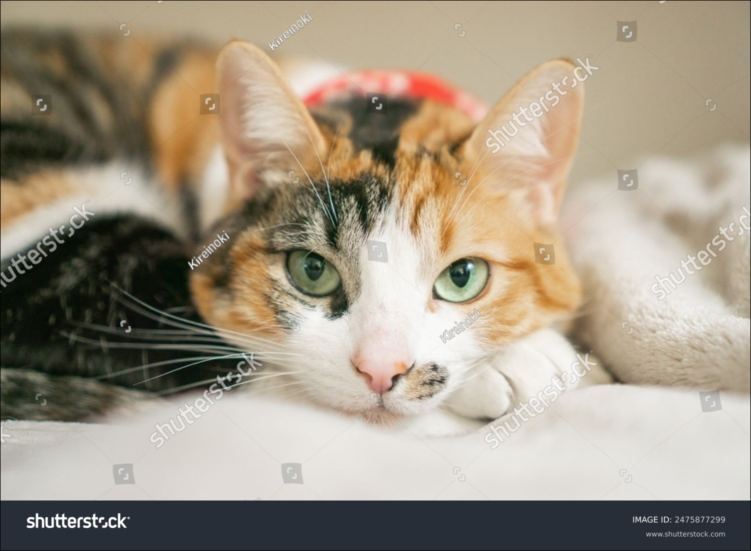

In [ ]:
using FileIO, ImageShow
img = load("cat.jpg")

In [ ]:
typeof(img)

Matrix{RGB{N0f8}} (alias for Array{ColorTypes.RGB{FixedPointNumbers.Normed{UInt8, 8}}, 2})

In [ ]:
channelview(img)

3×1100×1500 reinterpret(reshape, N0f8, ::Array{RGB{N0f8},2}) with eltype N0f8:
[:, :, 1] =
 0.808  0.796  0.757  0.694  0.627  0.592  0.608  …  0.153  0.153  0.153  0.153  0.153  0.153
 0.761  0.749  0.71   0.647  0.58   0.545  0.565     0.18   0.18   0.18   0.18   0.18   0.18
 0.675  0.663  0.616  0.553  0.478  0.443  0.455     0.22   0.22   0.22   0.22   0.22   0.22

[:, :, 2] =
 0.627  0.612  0.596  0.6    0.616  0.627  0.643  …  0.153  0.153  0.153  0.153  0.153  0.153
 0.58   0.565  0.549  0.553  0.569  0.584  0.6       0.18   0.18   0.18   0.18   0.18   0.18
 0.494  0.471  0.455  0.451  0.467  0.475  0.482     0.22   0.22   0.22   0.22   0.22   0.22

[:, :, 3] =
 0.635  0.631  0.624  0.631  0.639  0.643  0.647  …  0.153  0.153  0.153  0.153  0.153  0.153
 0.588  0.584  0.576  0.584  0.592  0.6    0.604     0.18   0.18   0.18   0.18   0.18   0.18
 0.494  0.49   0.482  0.482  0.49   0.49   0.486     0.22   0.22   0.22   0.22   0.22   0.22

;;; … 

[:, :, 1498] =
 0.6    0.604  0.60

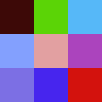

In [ ]:
rand(RGB, 3,3)

### Now let's get a bunch of images

In [ ]:
imgs = CIFAR10(:train)

dataset CIFAR10:
  metadata  =>    Dict{String, Any} with 2 entries
  split     =>    :train
  features  =>    32×32×3×50000 Array{Float32, 4}
  targets   =>    50000-element Vector{Int64}

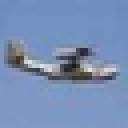

In [ ]:
colorview(RGB, permutedims(imgs[rand(1:end)].features, (3, 2,1)))

Remember how Arrays are column major? Similarly, batches are the last dimension in Flux.jl. That means multiple images can be stacked one on top of the other using the last dimension, and we get a batch of images.

In [ ]:
data = imgs[1:100].features

32×32×3×100 Array{Float32, 4}:
[:, :, 1, 1] =
 0.231373  0.0627451  0.0980392  0.129412  0.196078  …  0.862745  0.815686  0.705882  0.694118
 0.168627  0.0        0.0627451  0.14902   0.231373     0.788235  0.788235  0.678431  0.658824
 0.196078  0.0705882  0.192157   0.341176  0.4          0.729412  0.776471  0.729412  0.701961
 0.266667  0.2        0.32549    0.415686  0.498039     0.67451   0.74902   0.760784  0.737255
 0.384314  0.345098   0.431373   0.45098   0.486275     0.611765  0.717647  0.776471  0.792157
 0.466667  0.470588   0.505882   0.458824  0.47451   …  0.556863  0.670588  0.788235  0.854902
 0.545098  0.501961   0.509804   0.447059  0.470588     0.556863  0.623529  0.741176  0.854902
 0.568627  0.498039   0.47451    0.411765  0.447059     0.6       0.576471  0.678431  0.811765
 0.584314  0.494118   0.443137   0.419608  0.419608     0.588235  0.529412  0.611765  0.74902
 0.584314  0.454902   0.439216   0.47451   0.490196     0.545098  0.509804  0.545098  0.686275
 0.51

In [ ]:
targets = Flux.onehotbatch(imgs[1:100].targets, 0:9)

10×100 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  1  ⋅  1
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  1  ⋅  ⋅  ⋅     1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  1     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [ ]:
dataloader = Flux.DataLoader((data, targets), batchsize = 32)

4-element DataLoader(::Tuple{Array{Float32, 4}, OneHotArrays.OneHotMatrix{UInt32, Vector{UInt32}}}, batchsize=32)
  with first element:
  (32×32×3×32 Array{Float32, 4}, 10×32 OneHotMatrix(::Vector{UInt32}) with eltype Bool,)

!!! In practice, data is preprocessed to match certain data assumptions while training, and those greatly affect the model performance, however, for now we will skip that part for brevity.

## Model

Now that we have our data set, we can now define a neural network that will perform the job of our algorithm. Since we are working with images which have specific objects (and therefore shape), we will make use of networks known as convolutional networks. They operate by operating only on a patch of an image at once, sliding a _kernel_ matrix across the entire image.

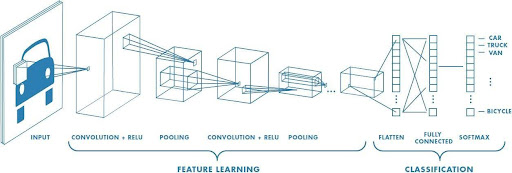

Flux comes preloaded with a number of layers (`Conv` being one of them). The first argument to it is the size of this kernel array, and the second argument denotest the number of channels it would input, and how many it would output.

Our dataset is composed of a bunch of images. Each image is made up of pixels, which in turn are made up of RGB values. These are fundamental colours and therefore each form independent axes, representing structural information about the objects in the images. These therefore represent 3 distinct channels of information.

In [ ]:
m = Chain(
  Conv((5,5), 3=>16, relu),
  MaxPool((2,2)),
  Conv((5,5), 16=>8, relu),
  MaxPool((2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(200 => 120),
  Dense(120 => 84),
  Dense(84 => 10),
  softmax) |> gpu

Model predictions are simple to obtain. All we need to do is call the model with the data we wish to infer on, and we will get what the model thinks the answer is.

In [90]:
m(data)

10×100 Matrix{Float32}:
 0.103685   0.113688   0.0821166  0.101264   …  0.111068   0.0917613  0.0962364  0.109164
 0.128335   0.106811   0.0987656  0.113488      0.1265     0.10985    0.114883   0.129178
 0.0769443  0.0745222  0.0692418  0.0922084     0.0838659  0.0783528  0.085934   0.0792721
 0.0651768  0.0885508  0.0782604  0.0883742     0.0903035  0.0840681  0.0887305  0.0770743
 0.111231   0.0923248  0.0915222  0.0924739     0.0919404  0.0937991  0.112813   0.129333
 0.0981655  0.113363   0.146747   0.108523   …  0.0998945  0.115842   0.0941159  0.0983624
 0.0900377  0.0999106  0.0959191  0.0920849     0.0919662  0.0887536  0.0860746  0.0751466
 0.0959483  0.107499   0.128781   0.101179      0.102965   0.126593   0.107016   0.0886256
 0.0981968  0.0936408  0.0824316  0.0961572     0.094669   0.0966346  0.103429   0.100683
 0.13228    0.109689   0.126215   0.114248      0.106828   0.114345   0.110767   0.113161

### Pretrained Models

The Flux ecosystem has a number of packages each of which specialize in their own class of problems and model definitions. Flux has been used in a wide variety of problem settings, which we will discuss shortly. For now, let us load in a pretrained `ResNet` model from the Metalhead library. This model is trained on the ImageNet 1k dataset.

In [92]:
resnet = ResNet(18, pretrain = true)

ResNet(
  Chain(
    Chain(
      Chain(
        Conv((7, 7), 3 => 64, pad=3, stride=2, bias=false),  # 9_408 parameters
        BatchNorm(64, relu),            # 128 parameters, plus 128
        MaxPool((3, 3), pad=1, stride=2),
      ),
      Chain(
        Parallel(
          addact(NNlib.relu, ...),
          identity,
          Chain(
            Conv((3, 3), 64 => 64, pad=1, bias=false),  # 36_864 parameters
            BatchNorm(64),              # 128 parameters, plus 128
            NNlib.relu,
            Conv((3, 3), 64 => 64, pad=1, bias=false),  # 36_864 parameters
            BatchNorm(64),              # 128 parameters, plus 128
          ),
        ),
        Parallel(
          addact(NNlib.relu, ...),
          identity,
          Chain(
            Conv((3, 3), 64 => 64, pad=1, bias=false),  # 36_864 parameters
            BatchNorm(64),              # 128 parameters, plus 128
            NNlib.relu,
            Conv((3, 3), 64 => 64, pad=1, bias=false),  # 36_864 pa

In [94]:
resnet(data)

1000×100 Matrix{Float32}:
  1.04626    -1.27521    -2.86634   -1.69235    …   1.26835     1.02303     -2.49724
  2.10381    -1.81346    -0.996915  -0.498167       1.06038    -0.132576     2.1214
 -0.596925   -0.432202    0.420227  -0.24087        0.0635093  -0.843014     1.75907
  1.29824    -1.19507    -0.250994  -0.51147        1.48486     0.659951    -0.639665
  1.25344    -0.620344   -0.675797   0.582588       1.77295     1.93091      0.567375
  5.18187     0.0213977   0.271489   1.52737    …   3.8012      2.75633     -0.413731
  4.37543    -0.204005    0.361896   0.801995       4.57714     3.57628     -1.00736
  0.402329    1.06969     0.567541   1.13418        0.778441    1.72027      2.26318
  0.73414     0.962407    0.950879   0.341078       1.71306     1.11501      1.0982
  1.49956     1.76571     1.71132    0.573573       2.15948     4.38042      1.71563
  0.854705   -1.05103     1.61077   -0.0210268  …   1.00817    -0.208816    -0.352863
 -0.107944   -0.455824   -0.845092  -

## Grading

From our previous discussion, remember that we use loss functions to grade how our model performed on the given task. Here we are trying to classify the images in one of 10 categories. The `softmax` function outputs a probability of sorts. You can imagine each of the lines in every column is the probabilty the model predicts that the particular image belongs to that class.

In order to optimise this function, we will make use of a maximum likelihood function which will find the difference between the prediction and the actual values of interest.

In [95]:
Flux.crossentropy(m(data), targets)

2.3176308f0

## Gradients - The Secret Sauce

We spoke earlier about how we make use of gradients to indicate the model how to improve its predictions - both the direction and the magnitude.

The crucial design decisions here enable Julia and Flux to differentiate almost all of the Julia Language! This is by means of Automatic Differentiation.

In [99]:
using Flux: Zygote

All of Julia is itself written in Julia. This means as long as we can differentiate base Julia, we can differentiate any function written in Julia, including in its vast package ecosystem automatically!

While automatic differentiation itself isn't unique to Julia, its implementation to capture the base functions means all Julia code is a candidate for differentiation. Let's see:

Let us plot the `sin` function.

In [ ]:
plot(sin, 0:0.01:5)

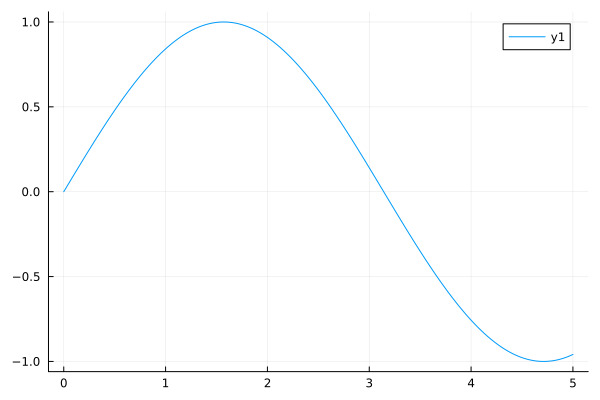

We know that the derivative of `sin` is `cos`. Let us try to write a function which can differentiate this function.

In [97]:
df(x) = Zygote.gradient(sin, x)[1]

df (generic function with 1 method)

In [100]:
df(0.)

1.0

Let us now plot this function `df` and see what we get.

In [ ]:
plot(df, 0:0.01:5)

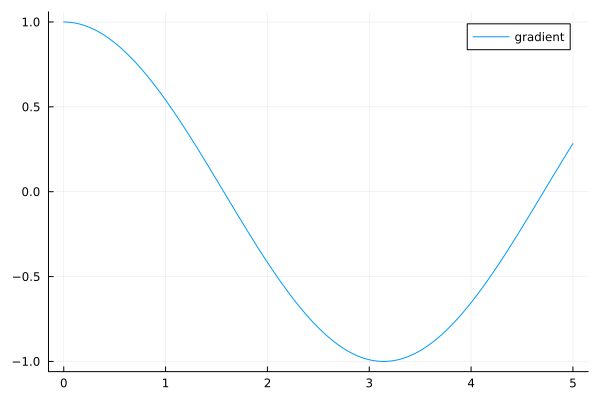

We will now plot the `cos` function on top of this function, and compare. These plots should be identical.

In [ ]:
plot!(cos, 0:0.01:5)

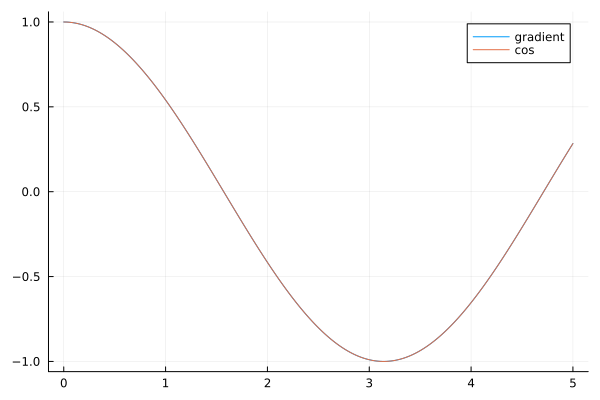

With this we see that Zygote and Flux can differentiate built in Julia functions. But is this going to work on more complex cases? We will now define the `sin` function as a taylor expansion.

In [101]:
function taylor_sin(x, terms)
    sum = 0.0
    for n in 0:(terms-1)
        term = ((-1)^n * x^(2n+1)) / factorial(2n+1)
        sum += term
    end
    return sum
end

taylor_sin (generic function with 1 method)

Let us plot this over the `sin` function and verify these give us the expected values.

In [ ]:
plot(taylor_sin, 0:0.01:5)

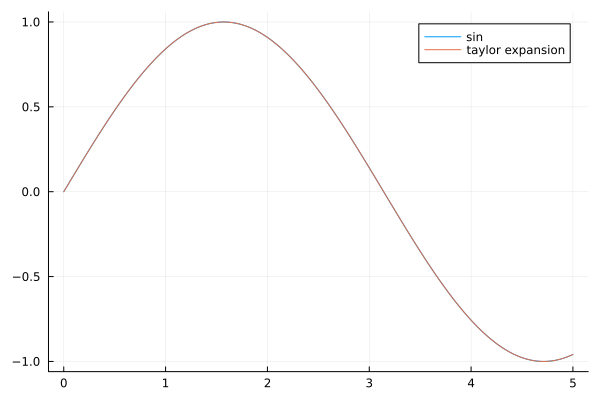

Indeed they produce identical plots. Let us now differiate this much more complex function.

In [ ]:
dtaylor(x) = Zygote.gradient(x -> taylor_sin(x, 10), x)
plot(dtaylor, 0:0.01:5)

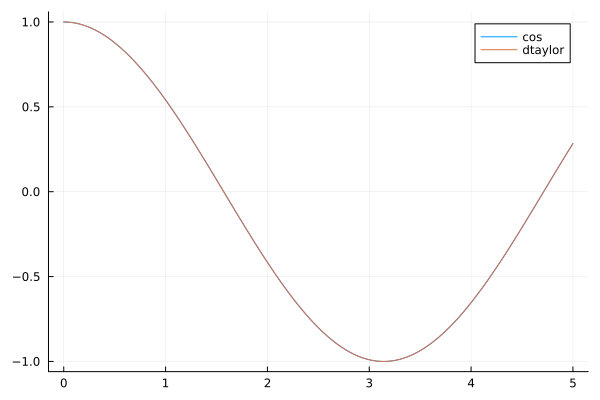

These are indeed identical to the `cos` function too! This gives rise to a very interesting phenomenon. One where we do not need to write specialized libraries that work on subsets of languages or features. We can use existing packages and do interesting analyses with them!

This gives Julia a unique advatage for upcoming fields leveraging Machine Learning, and fast tracks the development of Scientific Machine Learning.

There are several packages in the ecosystem which use automatic differentiation and generate differentiable code to plug into Machine Learning workflows opening up several opportunities. Some of the examples are shown in the following slide.

## Scientific Machine Learning

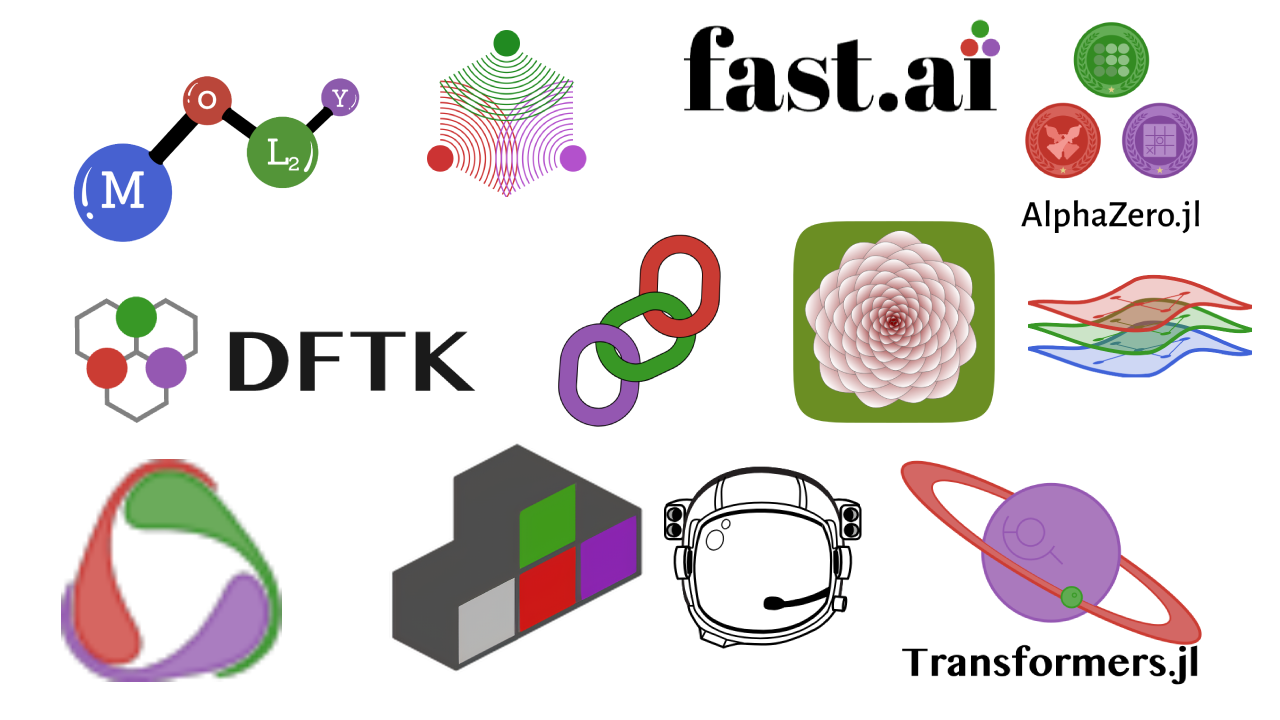

Before we can proceed, let us calculate the gradients for our model parameters through our loss function.

In [103]:
grads = Zygote.gradient(m) do m
  Flux.crossentropy(m(data), targets)
end

((layers = ((σ = nothing, weight = Float32[0.0038818393 0.0037830558 … 0.003383804 0.004392593; 0.006533066 0.0039008302 … 0.0022758737 0.0038918846; … ; 0.009672914 0.006758165 … 0.0026389875 0.0038873353; 0.008463145 0.006262228 … 0.0029075684 0.004353579;;; 0.0031799579 0.0034454102 … 0.0032773013 0.005208452; 0.007016988 0.0046606837 … 0.0026025982 0.0048036342; … ; 0.010320408 0.007095709 … 0.0029949504 0.004299609; 0.008625788 0.006243519 … 0.0023217355 0.0038928997;;; 0.0032403383 0.0039754687 … 0.0032448072 0.0052931146; 0.0065114307 0.004971414 … 0.0023001325 0.004027088; … ; 0.007856862 0.0055825 … 0.0020546091 0.0027397876; 0.005833354 0.004271463 … 0.00039560595 0.0018013051;;;; 0.038651846 0.03652577 … 0.029145606 0.016573798; 0.038326275 0.037076302 … 0.026523113 0.018101709; … ; 0.02772623 0.02249489 … 0.024781948 0.017554738; 0.021453053 0.017273933 … 0.017733924 0.015928967;;; 0.03318933 0.03071529 … 0.025456319 0.015847646; 0.0340857 0.031932164 … 0.024201859 0.017095

## Optimisers

Optimisers determine how our gradients are applied to update the parameter values in the neural networks. Flux has several popular optimisers built-in. We are going to use optimisers from the Optimiers.jl package.

In [108]:
opt = Optimisers.Adam()
st = Optimisers.setup(opt, m);

In [105]:
st, m = Optimisers.update(st, m, grads...)

((layers = ((σ = (), weight = Leaf(Adam(0.001, (0.9, 0.999), 1.0e-8), (Float32[0.000388184 0.000378306 … 0.00033838 0.000439259; 0.000653307 0.000390083 … 0.000227587 0.000389189; … ; 0.000967292 0.000675817 … 0.000263899 0.000388734; 0.000846315 0.000626223 … 0.000290757 0.000435358;;; 0.000317996 0.000344541 … 0.00032773 0.000520845; 0.000701699 0.000466068 … 0.00026026 0.000480364; … ; 0.00103204 0.000709571 … 0.000299495 0.000429961; 0.000862579 0.000624352 … 0.000232174 0.00038929;;; 0.000324034 0.000397547 … 0.000324481 0.000529312; 0.000651143 0.000497142 … 0.000230013 0.000402709; … ; 0.000785686 0.00055825 … 0.000205461 0.000273979; 0.000583336 0.000427146 … 3.95606f-5 0.000180131;;;; 0.00386519 0.00365258 … 0.00291456 0.00165738; 0.00383263 0.00370763 … 0.00265231 0.00181017; … ; 0.00277262 0.00224949 … 0.0024782 0.00175547; 0.00214531 0.00172739 … 0.00177339 0.0015929;;; 0.00331893 0.00307153 … 0.00254563 0.00158476; 0.00340857 0.00319322 … 0.00242019 0.0017095; … ; 0.002560

In [107]:
Flux.crossentropy(m(data), targets)

2.246191f0

Just like that we see that the loss has indeed dropped! This means our model successfully learns. We can now iteratively apply these steps in a loop and observe the loss go down and the accuracy go up.

## Training in a Loop

In [115]:
accuracy(x, y) = mean(Flux.onecold(m(x), 0:9) .== Flux.onecold(y, 0:9))

accuracy (generic function with 1 method)

In [116]:
n = 100

for e in 1:n
  grads = Zygote.gradient(m) do m
    Flux.crossentropy(m(data), targets)
  end
  st, m = Optimisers.update(st, m, grads...)
  if e % 10 == 0
    acc = accuracy(data, targets)
    loss = Flux.crossentropy(m(data), targets)

    @info "Epoch $e: Loss: $loss Accuracy: $acc"
  end

end

[ Info: Epoch 10: Loss: 0.78443456 Accuracy: 0.77
[ Info: Epoch 20: Loss: 0.4201484 Accuracy: 0.89
[ Info: Epoch 30: Loss: 0.18136328 Accuracy: 1.0
[ Info: Epoch 40: Loss: 0.06329779 Accuracy: 1.0
[ Info: Epoch 50: Loss: 0.026177699 Accuracy: 1.0
[ Info: Epoch 60: Loss: 0.013595833 Accuracy: 1.0
[ Info: Epoch 70: Loss: 0.00860501 Accuracy: 1.0
[ Info: Epoch 80: Loss: 0.006228902 Accuracy: 1.0
[ Info: Epoch 90: Loss: 0.0048879394 Accuracy: 1.0
[ Info: Epoch 100: Loss: 0.0040177274 Accuracy: 1.0


Excellent! Our little model was able to learn after all. Let us verify the results it produces.

In [117]:
propertynames(imgs)

(:metadata, :split, :features, :targets)

In [118]:
imgs.metadata

Dict{String, Any} with 2 entries:
  "n_observations" => 50000
  "class_names"    => ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "sh…

In [127]:
function inference(m, img)
  pred = m(img)
  l = Flux.onecold(pred)
  imgs.metadata["class_names"][l]
end

inference (generic function with 1 method)

In [129]:
inference(m, data[:, :, :, 1:10])

10-element Vector{String}:
 "frog"
 "truck"
 "truck"
 "deer"
 "automobile"
 "automobile"
 "bird"
 "horse"
 "ship"
 "cat"

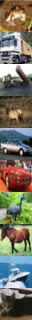

In [147]:
tiled = reduce(hcat, map(x -> permutedims(x, (3,2,1)), eachslice(imgs[1:10].features, dims = 4)))
colorview(RGB, tiled)